Un cercetător doreşte să studieze factorii care influenţează preţul apartamentelor într-un oraş. El a colectat date
 despre următoarele variabile pentru 100 de apartamente:

 ● preţul apartamentului (variabila dependentă 𝑦, exprimată în mii de euro);

 ● suprafaţa utilă (variabila independentă 𝑥1, exprimată în metri pătraţi);

 ● numărul de camere (variabila independentă 𝑥2);

 ● distanţa faţă de centrul oraşului (variabila independentă 𝑥3, exprimată în kilometri).

 Cercetătorul doreşte să construiască un model de regresie liniară multiplă care să estimeze preţul apartamentelor pe
 baza celor trei variabile independente.

 a) Realizaţi în PyMC un astfel de model, folosind setul de date din fişierul real_estate_data.csv.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_1, beta_2, beta_3, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


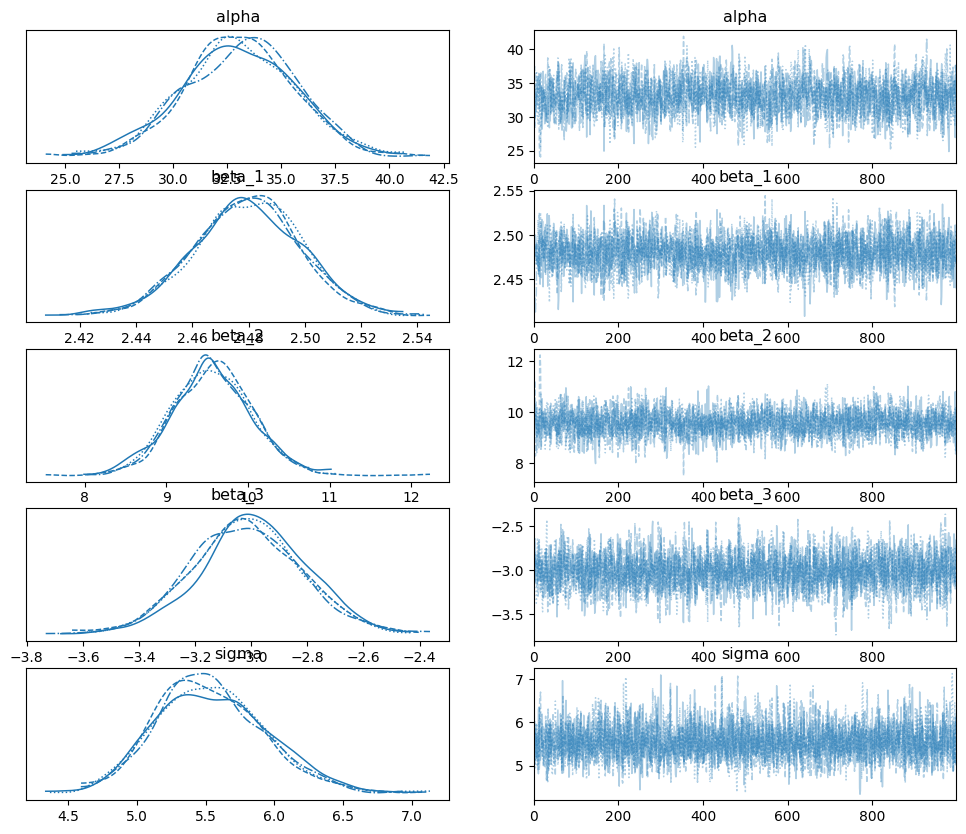

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   33.067  2.566  28.258   37.819      0.059    0.042    1873.0   
beta_1   2.480  0.019   2.445    2.516      0.000    0.000    2656.0   
beta_2   9.563  0.479   8.688   10.504      0.010    0.007    2490.0   
beta_3  -3.011  0.196  -3.377   -2.641      0.003    0.002    3155.0   
sigma    5.542  0.406   4.819    6.328      0.007    0.005    3326.0   

        ess_tail  r_hat  
alpha     2207.0    1.0  
beta_1    2354.0    1.0  
beta_2    2781.0    1.0  
beta_3    2334.0    1.0  
sigma     2855.0    1.0  


In [24]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

data = pd.read_csv("real_estate_data.csv")

with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10)
    beta_2 = pm.Normal("beta_2", mu=0, sigma=10)
    beta_3 = pm.Normal("beta_3", mu=0, sigma=10)
    
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    mu = (alpha + beta_1 * data["Surface_area"] + beta_2 * data["Rooms"]+ beta_3 * data["Distance_to_center"])
    
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=data["Price"])

    trace = pm.sample(samples=2000, tune=1000, return_inferencedata=True)

pm.plot_trace(trace)
plt.show()

summary = pm.summary(trace)
print(summary)

 b) Pe baza rezultatelor obţinute, ce factori credeţi că influenţează mai mult preţul apartamentelor?

In [45]:
hdi = az.hdi(trace, hdi_prob=0.97)

coefficients = sorted(["beta_1", "beta_2", "beta_3"], key=lambda x: (abs(hdi[x].mean())))

print("De la cel mai important la cel mai putin important in a influenta pretul apartamentelor:")
for coeff in coefficients:
    print(f"{coeff} are media {(hdi[coeff].values[0] + hdi[coeff].values[1])/2}")

De la cel mai important la cel mai putin important in a influenta pretul apartamentelor:
beta_1 are media 2.480700867672501
beta_3 are media -3.018815582237745
beta_2 are media 9.568237914390334
